<a href="https://colab.research.google.com/github/diegofer616/practico01/blob/main/Laboratorio_N2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REGRESION MULTIVARIABLE

importamos las librerias

In [64]:

import os
import numpy as np
from matplotlib import pyplot
%matplotlib inline
import pandas as pd

Subimos el .csv

In [65]:
data = pd.read_csv('/content/WeatherJena.csv', delimiter=';')

Vemos la información de csv

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   p (mbar)         200000 non-null  int64
 1   T (degC)         200000 non-null  int64
 2   Tdew (degC)      200000 non-null  int64
 3   rh (%)           200000 non-null  int64
 4   VPmax (mbar)     200000 non-null  int64
 5   VPact (mbar)     200000 non-null  int64
 6   VPdef (mbar)     200000 non-null  int64
 7   sh (g/kg)        200000 non-null  int64
 8   H2OC (mmol/mol)  200000 non-null  int64
 9   rho (g/m**3)     200000 non-null  int64
 10  Tlog (degC)      200000 non-null  int64
dtypes: int64(11)
memory usage: 16.8 MB


Tomamos la cantidad de filas, y separamos las columnas en X y Y

In [67]:
X = data.iloc[:, :-1]
y = data.iloc[:,-1]
m = y.size

Imprimimos los primeros valores de cada columna

In [68]:
print(X.head())

   p (mbar)  T (degC)  Tdew (degC)  rh (%)  VPmax (mbar)  VPact (mbar)  \
0     96756      -284         -341     958           495           475   
1     96745      -285         -343     957           495           474   
2     96745      -288         -346     958           494           473   
3     96734      -290         -347     958           493           472   
4     96729      -296         -353     958           491            47   

   VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  rho (g/m**3)  
0            21        306              491        124456  
1            21        305               49        124448  
2            21        305              489        124465  
3            21        304              488        124457  
4            21        303              486        124481  


Normalizamos los datos

In [70]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

LLamamos a la función de normalizar

In [71]:
X_norm, mu, sigma = featureNormalize(X)
print('Media calculada:\n', mu)
print('Desviación estandar calculada:\n', sigma)
print(X_norm)

Media calculada:
 p (mbar)            89931.516385
T (degC)              904.699850
Tdew (degC)           446.416535
rh (%)               2173.555730
VPmax (mbar)         1218.445350
VPact (mbar)          849.547060
VPdef (mbar)          369.939875
sh (g/kg)             536.698985
H2OC (mmol/mol)       857.281530
rho (g/m**3)       110640.100065
dtype: float64
Desviación estandar calculada:
 p (mbar)           26962.061762
T (degC)             892.234471
Tdew (degC)          724.533554
rh (%)              2261.842051
VPmax (mbar)         834.450177
VPact (mbar)         481.858713
VPdef (mbar)         479.967727
sh (g/kg)            305.476885
H2OC (mmol/mol)      488.095641
rho (g/m**3)       33544.180110
dtype: float64
        p (mbar)  T (degC)  Tdew (degC)    rh (%)  VPmax (mbar)  VPact (mbar)  \
0       0.253114 -1.332273    -1.086791 -0.537418     -0.866972     -0.777296   
1       0.252706 -1.333394    -1.089551 -0.537861     -0.866972     -0.779372   
2       0.252706 -1.336756 

Añadimos al X los valores de 1

In [72]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [73]:
def computeCostMulti(X, y, theta):
    m = y.shape[0]
    J = 0
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [74]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    return theta, J_history

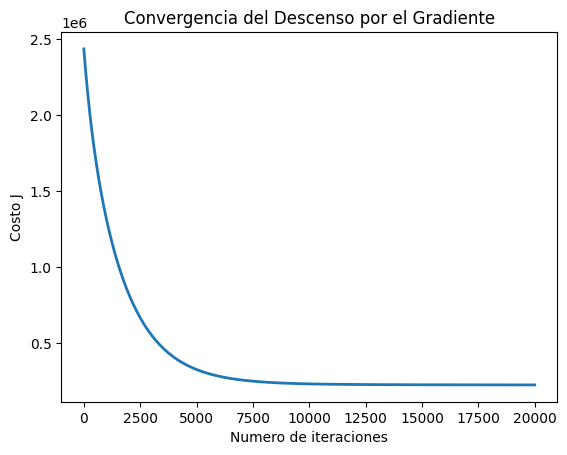

In [76]:
alpha = 0.0003
num_iters = 20000

theta = np.zeros(11)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')
pyplot.title('Convergencia del Descenso por el Gradiente')
pyplot.show()



Ahora subimos un .csv llamado Datos_Prediccion.csv, para que prediga valores

In [78]:
X_predic = pd.read_csv('/content/Datos_Prediccion.csv', delimiter=';')
tamanho = X_predic.shape[0]
X_predic[:] = (X_predic[:] - mu) / sigma
X_predic = np.concatenate([np.ones((tamanho, 1)), X_predic], axis=1)

for i in range(tamanho):
  X_array = X_predic[i, :]
  predic = np.dot(X_array, theta)
  print('Predicción de Registro de temperatura en grados Celsius N°', i+1, ': {:.0f}'.format(predic))

Predicción de Registro de temperatura en grados Celsius N° 1 : 2142
Predicción de Registro de temperatura en grados Celsius N° 2 : 2253
Predicción de Registro de temperatura en grados Celsius N° 3 : 2161
Predicción de Registro de temperatura en grados Celsius N° 4 : 2210
Predicción de Registro de temperatura en grados Celsius N° 5 : 2156
Predicción de Registro de temperatura en grados Celsius N° 6 : 2211
Predicción de Registro de temperatura en grados Celsius N° 7 : 2105
Predicción de Registro de temperatura en grados Celsius N° 8 : 2328
Predicción de Registro de temperatura en grados Celsius N° 9 : 2224
Predicción de Registro de temperatura en grados Celsius N° 10 : 2359
Predicción de Registro de temperatura en grados Celsius N° 11 : 2320
Predicción de Registro de temperatura en grados Celsius N° 12 : 2181
Predicción de Registro de temperatura en grados Celsius N° 13 : 2250
Predicción de Registro de temperatura en grados Celsius N° 14 : 2066
Predicción de Registro de temperatura en gr

ECUACION DE LA NORMAL

In [79]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/WeatherJena.csv', delimiter=';')

In [80]:
display(data)

,p (mbar),T (degC),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Tlog (degC)
0,96756,-284,-341,958,495,475,21,306,491,124456,859
1,96745,-285,-343,957,495,474,21,305,49,124448,853
2,96745,-288,-346,958,494,473,21,305,489,124465,852
3,96734,-290,-347,958,493,472,21,304,488,124457,854
4,96729,-296,-353,958,491,47,21,303,486,124481,855
...,...,...,...,...,...,...,...,...,...,...,...
199995,98715,1352,936,759,1552,1178,374,745,1193,119413,2158
199996,98718,1335,931,765,1535,1174,361,743,1189,119489,2152
199997,98733,1326,915,761,1526,1161,365,735,1176,119551,215
199998,9874,1322,915,763,1522,1161,361,735,1176,119576,2152


In [81]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
m = y.size

In [82]:
print(X.head())

   p (mbar)  T (degC)  Tdew (degC)  rh (%)  VPmax (mbar)  VPact (mbar)  \
0     96756      -284         -341     958           495           475   
1     96745      -285         -343     957           495           474   
2     96745      -288         -346     958           494           473   
3     96734      -290         -347     958           493           472   
4     96729      -296         -353     958           491            47   

   VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  rho (g/m**3)  
0            21        306              491        124456  
1            21        305               49        124448  
2            21        305              489        124465  
3            21        304              488        124457  
4            21        303              486        124481  


In [83]:
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [84]:
# Funcion de la ecuacion de la normal, obtenemos valores optimos
def normalEqn(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

Ahora generamos valores con los datos de entrada del .csv Datos_Prediccion

In [86]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y)
X_predic = pd.read_csv('/content/Datos_Prediccion.csv', delimiter=';')
tamanho = X_predic.shape[0]
X_predic = np.concatenate([np.ones((tamanho, 1)), X_predic], axis=1)

for i in range(tamanho):
  X_array = X_predic[i, :]
  predic = np.dot(X_array, theta)
  print('Predicción de Registro de temperatura en grados Celsius N°', i+1, ': {:.0f}'.format(predic))



Predicción de Registro de temperatura en grados Celsius N° 1 : 2254
Predicción de Registro de temperatura en grados Celsius N° 2 : 2296
Predicción de Registro de temperatura en grados Celsius N° 3 : 2192
Predicción de Registro de temperatura en grados Celsius N° 4 : 2240
Predicción de Registro de temperatura en grados Celsius N° 5 : 2267
Predicción de Registro de temperatura en grados Celsius N° 6 : 2257
Predicción de Registro de temperatura en grados Celsius N° 7 : 2211
Predicción de Registro de temperatura en grados Celsius N° 8 : 2357
Predicción de Registro de temperatura en grados Celsius N° 9 : 2354
Predicción de Registro de temperatura en grados Celsius N° 10 : 2389
Predicción de Registro de temperatura en grados Celsius N° 11 : 2344
Predicción de Registro de temperatura en grados Celsius N° 12 : 2289
Predicción de Registro de temperatura en grados Celsius N° 13 : 2276
Predicción de Registro de temperatura en grados Celsius N° 14 : 2268
Predicción de Registro de temperatura en gr

REGRESION POLINOMIAL

In [87]:

data = pd.read_csv('/content/WeatherJena.csv', delimiter=";")

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   p (mbar)         200000 non-null  int64
 1   T (degC)         200000 non-null  int64
 2   Tdew (degC)      200000 non-null  int64
 3   rh (%)           200000 non-null  int64
 4   VPmax (mbar)     200000 non-null  int64
 5   VPact (mbar)     200000 non-null  int64
 6   VPdef (mbar)     200000 non-null  int64
 7   sh (g/kg)        200000 non-null  int64
 8   H2OC (mmol/mol)  200000 non-null  int64
 9   rho (g/m**3)     200000 non-null  int64
 10  Tlog (degC)      200000 non-null  int64
dtypes: int64(11)
memory usage: 16.8 MB


In [89]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
m = y.size

In [90]:
print(X)
print(y)
print(m)

        p (mbar)  T (degC)  Tdew (degC)  rh (%)  VPmax (mbar)  VPact (mbar)  \
0          96756      -284         -341     958           495           475   
1          96745      -285         -343     957           495           474   
2          96745      -288         -346     958           494           473   
3          96734      -290         -347     958           493           472   
4          96729      -296         -353     958           491            47   
...          ...       ...          ...     ...           ...           ...   
199995     98715      1352          936     759          1552          1178   
199996     98718      1335          931     765          1535          1174   
199997     98733      1326          915     761          1526          1161   
199998      9874      1322          915     763          1522          1161   
199999     98737      1330          921     762           153          1165   

        VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  r

In [91]:
X = np.concatenate([X, X * X], axis=1)

In [92]:
print(X)

[[      96756        -284        -341 ...       93636      241081
  15489295936]
 [      96745        -285        -343 ...       93025        2401
  15487304704]
 [      96745        -288        -346 ...       93025      239121
  15491536225]
 ...
 [      98733        1326         915 ...      540225     1382976
  14292441601]
 [       9874        1322         915 ...      540225     1382976
  14298419776]
 [      98737        1330         921 ...      544644       13924
  14289094369]]


In [93]:
num_filas, num_columnas = X.shape
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 200000
Número de columnas: 20


In [94]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [95]:

X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[      96756        -284        -341 ...       93636      241081
  15489295936]
 [      96745        -285        -343 ...       93025        2401
  15487304704]
 [      96745        -288        -346 ...       93025      239121
  15491536225]
 ...
 [      98733        1326         915 ...      540225     1382976
  14292441601]
 [       9874        1322         915 ...      540225     1382976
  14298419776]
 [      98737        1330         921 ...      544644       13924
  14289094369]]
Media calculada: [8.99315164e+04 9.04699850e+02 4.46416535e+02 2.17355573e+03
 1.21844535e+03 8.49547060e+02 3.69939875e+02 5.36698985e+02
 8.57281530e+02 1.10640100e+05 8.81463041e+09 1.61456417e+06
 7.24236594e+05 9.84027398e+06 2.18091617e+06 9.53918027e+05
 3.67224530e+05 3.81361928e+05 9.73168976e+05 1.33664438e+10]
Desviación estandar calculada: [2.69620618e+04 8.92234471e+02 7.24533554e+02 2.26184205e+03
 8.34450177e+02 4.81858713e+02 4.79967727e+02 3.05476885e+02
 4.88095641e+02 3.35441801e+04 2

In [96]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [98]:
def computeCostMulti(X, y, theta):

    m = y.shape[0]

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [99]:
def gradientDescentPoly(X, y, theta, alpha, num_iters):


    m = y.shape[0]
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

In [100]:
num_filas, num_columnas = X.shape
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 200000
Número de columnas: 21


Text(0, 0.5, 'Costo J')

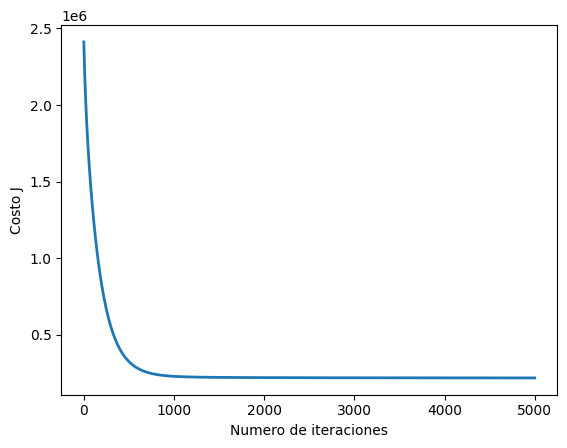

In [102]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.003
num_iters = 5000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(21)
theta, J_history = gradientDescentPoly(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')


Sacamos valores de predicción con el csv Datos_Prediccion.csv

In [103]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y)
X_predic = pd.read_csv('/content/Datos_Prediccion.csv', delimiter=';')
tamanho = X_predic.shape[0]
X_predic= np.concatenate([X_predic, X_predic * X_predic], axis=1)
X_predic[:] = (X_predic[:] - mu) / sigma
X_predic = np.concatenate([np.ones((tamanho, 1)), X_predic], axis=1)

for i in range(tamanho):
  X_array = X_predic[i, :]
  predic = np.dot(X_array, theta)
  print('Predicción de Registro de temperatura en grados Celsius N°', i+1, ': {:.0f}'.format(predic))

Predicción de Registro de temperatura en grados Celsius N° 1 : 1933
Predicción de Registro de temperatura en grados Celsius N° 2 : 1973
Predicción de Registro de temperatura en grados Celsius N° 3 : 2000
Predicción de Registro de temperatura en grados Celsius N° 4 : 1983
Predicción de Registro de temperatura en grados Celsius N° 5 : 1931
Predicción de Registro de temperatura en grados Celsius N° 6 : 1986
Predicción de Registro de temperatura en grados Celsius N° 7 : 1937
Predicción de Registro de temperatura en grados Celsius N° 8 : 1976
Predicción de Registro de temperatura en grados Celsius N° 9 : 1976
Predicción de Registro de temperatura en grados Celsius N° 10 : 1976
Predicción de Registro de temperatura en grados Celsius N° 11 : 1976
Predicción de Registro de temperatura en grados Celsius N° 12 : 1930
Predicción de Registro de temperatura en grados Celsius N° 13 : 1986
Predicción de Registro de temperatura en grados Celsius N° 14 : 1933
Predicción de Registro de temperatura en gr